<a href="https://colab.research.google.com/github/KingBeeM/Daily_Coding/blob/main/Python/20230421_kaggle.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# DATA LOAD

In [1]:
import pandas as pd

wine = pd.read_csv('https://bit.ly/wine_csv_data')
wine

,alcohol,sugar,pH,class
0,9.4,1.9,3.51,0.0
1,9.8,2.6,3.20,0.0
2,9.8,2.3,3.26,0.0
3,9.8,1.9,3.16,0.0
4,9.4,1.9,3.51,0.0
...,...,...,...,...
6492,11.2,1.6,3.27,1.0
6493,9.6,8.0,3.15,1.0
6494,9.4,1.2,2.99,1.0
6495,12.8,1.1,3.34,1.0


## Feature Engineering
- 정규화

In [3]:
# wine data : 종속 class , 독립 alcohol, sugar, pH 으로 나누기

data = wine[["alcohol", "sugar", "pH"]].to_numpy()
target = wine["class"].to_numpy()

data.shape, target.shape

((6497, 3), (6497,))

### 데이터셋 분리
- scikit-learn machine learning pipeline
- Data Leakage 예방

In [6]:
# train data, test data 는 분리되어야한다. (섞이면 안됨)

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    data, target, test_size=0.2, random_state=42
)

X_train.shape, X_test.shape, y_train.shape, y_test.shape

((5197, 3), (1300, 3), (5197,), (1300,))

### 정규화
- 수치 데이터의 단위가 다름
 + ex) 키, 몸무게
- 표준화 정규화
 + ex) Min-Max Scaler : 0 ~ 1
 + 수치 변환으로 원래의 값 정보를 잃어버림
 + 수치 변환으로 데이터 순서는 변동이 없음

- 선형 모델 vs 비선형모델
  + 선형 모델 : 정규화 작업 필요
    * 인코딩 된 변수 (ex. 더미 인코딩 (0 과 1), 라벨 변수) 값에 정규화 작업 할 필요가 없음
 + 비선형 모델 : 정규화 작업 불필요

In [7]:
# train data, test data 는 분리되어야한다. (섞이면 안됨)

from sklearn.preprocessing import StandardScaler
ss = StandardScaler()
ss.fit(X_train)

StandardScaler()

In [8]:
train_scaled = ss.transform(X_train)
test_scaled = ss.transform(X_test)

train_scaled.shape, test_scaled.shape

((5197, 3), (1300, 3))

In [10]:
# 변환 값 확인

X_train[0], train_scaled[0]

(array([10.5 ,  7.7 ,  3.19]), array([ 0.01376574,  0.4646116 , -0.16888369]))

### 모델링

In [15]:
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier(random_state=42)
dt.fit(train_scaled, y_train)

print("훈련평가 :", dt.score(train_scaled, y_train))
print("검증평가 :", dt.score(test_scaled, y_test))

# 훈련평가 : 99.69%
# 검증평가 : 85.92%
# 과적합 (훈련평가 검증평가 차이 줄여야 함.)

훈련평가 : 0.996921300750433
검증평가 : 0.8592307692307692


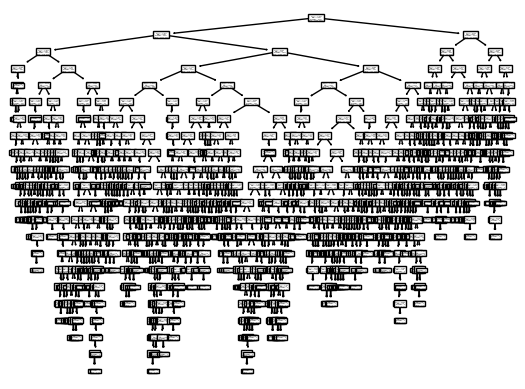

In [16]:
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

# 위에 따로 값을 주지 않아서 default로 모든 조건에 대해서 다 분류함

plt.figure()
plot_tree(dt)
plt.show()

## HyperParameter Tuning
- 세부 조건을 너무 많이 주면 시간이 오래 걸릴 수 있음을 명시한다.

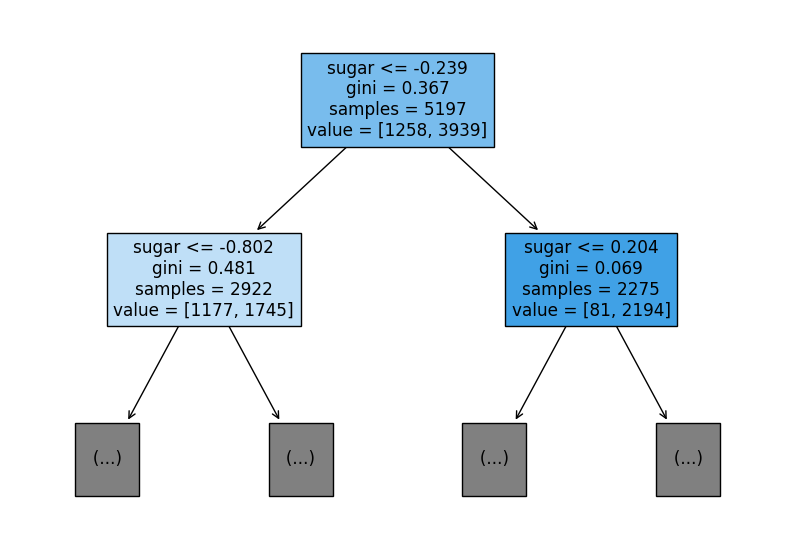

In [17]:
# max_depth 를 너무 낮추면
# 오히려 과소적합이 일어날 수 있다.

plt.figure(figsize=(10,7))
plot_tree(dt, max_depth=1, filled=True, feature_names=['alcohol', 'sugar', 'pH'])
plt.show()

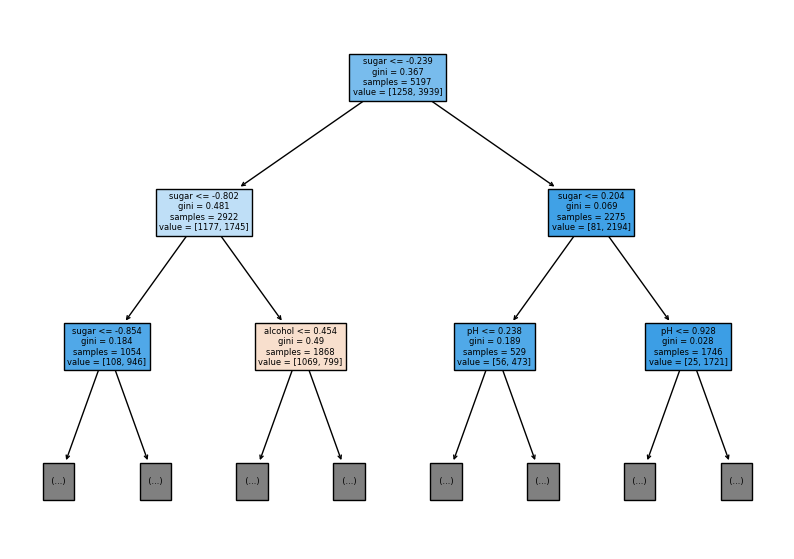

In [18]:
plt.figure(figsize=(10,7))
plot_tree(dt, max_depth=2, filled=True, feature_names=['alcohol', 'sugar', 'pH'])
plt.show()

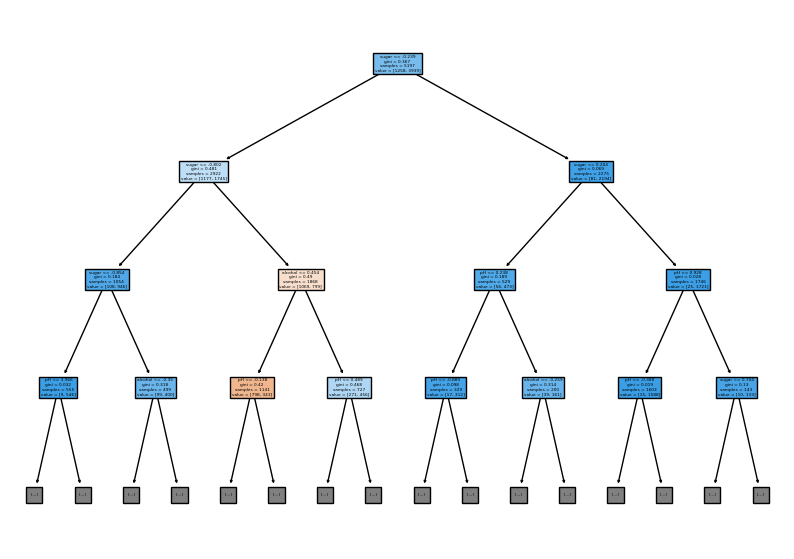

In [19]:
plt.figure(figsize=(10,7))
plot_tree(dt, max_depth=3, filled=True, feature_names=['alcohol', 'sugar', 'pH'])
plt.show()

훈련평가 : 0.8454877814123533
검증평가 : 0.8415384615384616
정확도 차이 : 0.003949319873891688


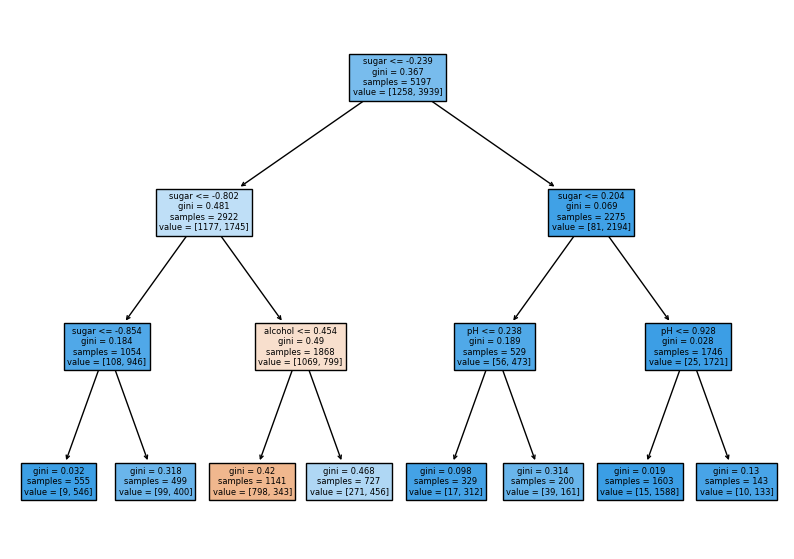

In [23]:
from sklearn.tree import DecisionTreeClassifier
import matplotlib.pyplot as plt

dt = DecisionTreeClassifier(max_depth=3, random_state=42)
dt.fit(train_scaled, y_train)

print("훈련평가 :", dt.score(train_scaled, y_train))
print("검증평가 :", dt.score(test_scaled, y_test))
print("정확도 차이 :", dt.score(train_scaled, y_train) - dt.score(test_scaled, y_test))

plt.figure(figsize=(10,7))
plot_tree(dt, max_depth=3, filled=True, feature_names=['alcohol', 'sugar', 'pH'])
plt.show()

## 혼동행렬(Confusion Matrix)

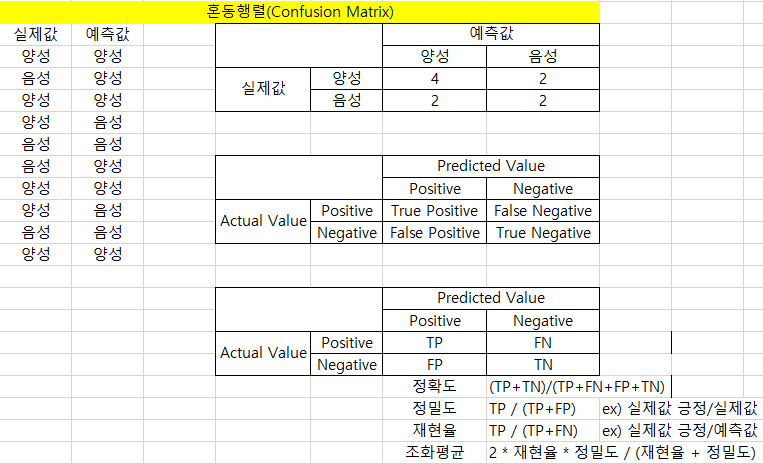